### Water Potability Classification

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.213302  189.681916  21057.662214     8.114224  230.507961    426.226462   
1  6.272011  188.020564  25394.740904     8.153630  383.472420    358.882079   
2  7.525316  172.133603  11166.376305     7.899896  326.518080    420.570021   
3  7.658395  217.139317  18288.211026     7.528133  294.005453    400.717449   
4  5.634275  209.385848  24974.919772     7.495392  314.950949    531.406569   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        9.954290        57.316487   3.100232           1  
1       13.810410        72.154087   2.741828           0  
2        8.614537        72.367363   4.332616           0  
3       11.138576        72.966391   4.153343           0  
4       13.023235        76.684441   1.775441           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  -

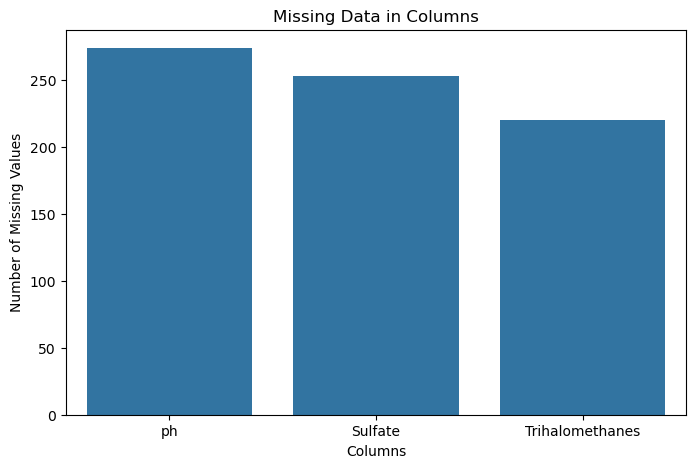

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('water_potability.csv')

print(df.head())
df.info()
print(df.describe().round(2))

missing_per_column = df.isnull().sum()

only_missing = missing_per_column[missing_per_column > 0]

percent_missing = ((only_missing / len(df)) * 100).round(2)

missing_table = pd.DataFrame({'Number of Missing Values': only_missing, 'Percent Missing %': percent_missing})

print("\nColumns with missing values:")
print(missing_table)

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_table.index, y=missing_table['Number of Missing Values'])
plt.title("Missing Data in Columns")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

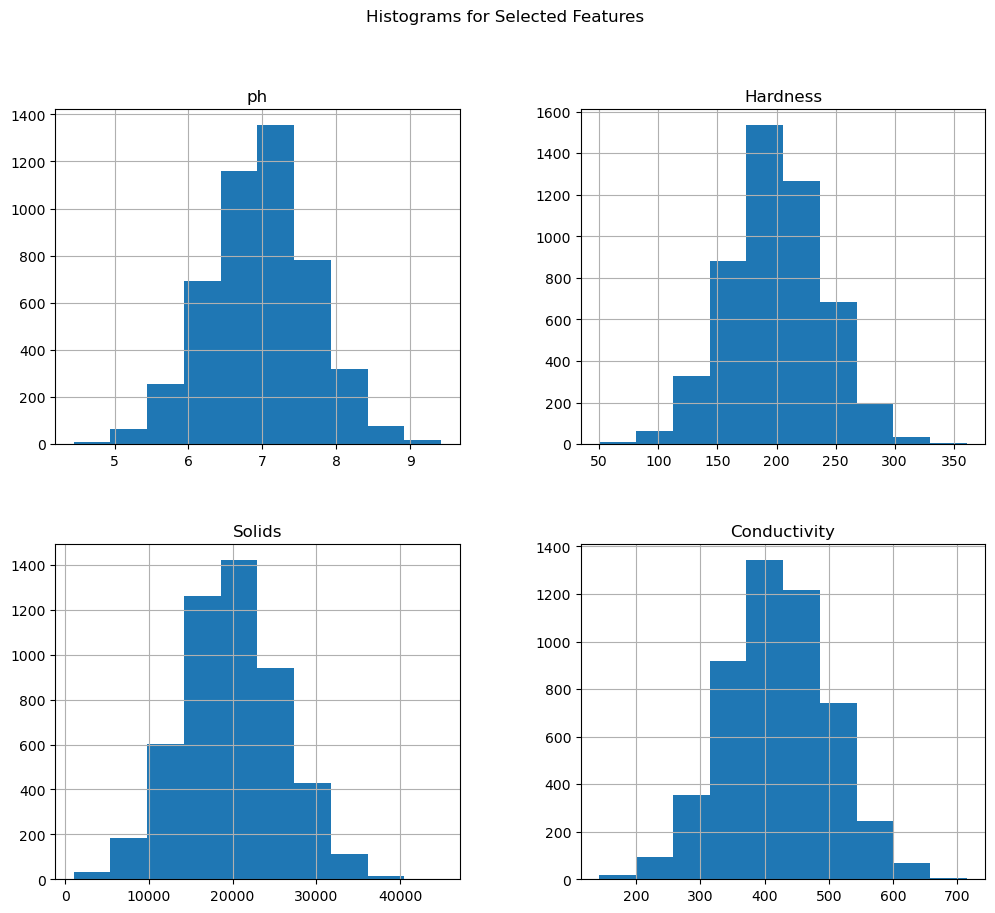

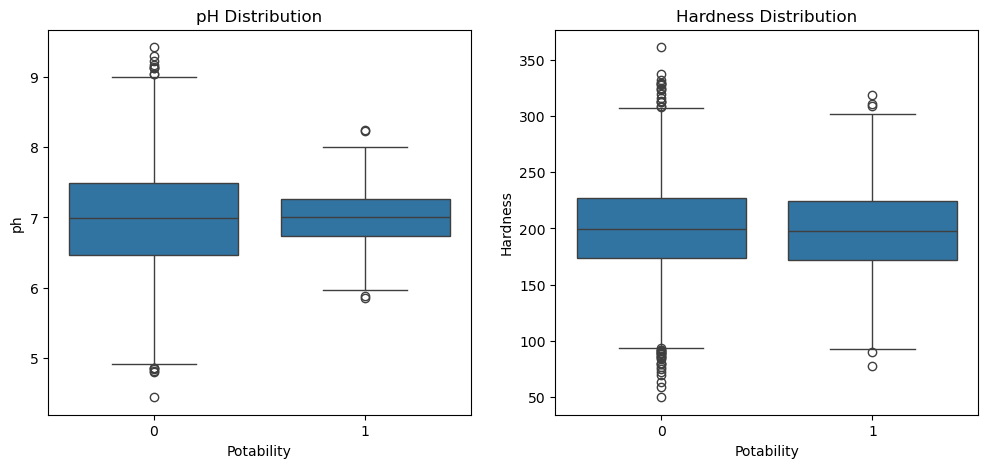

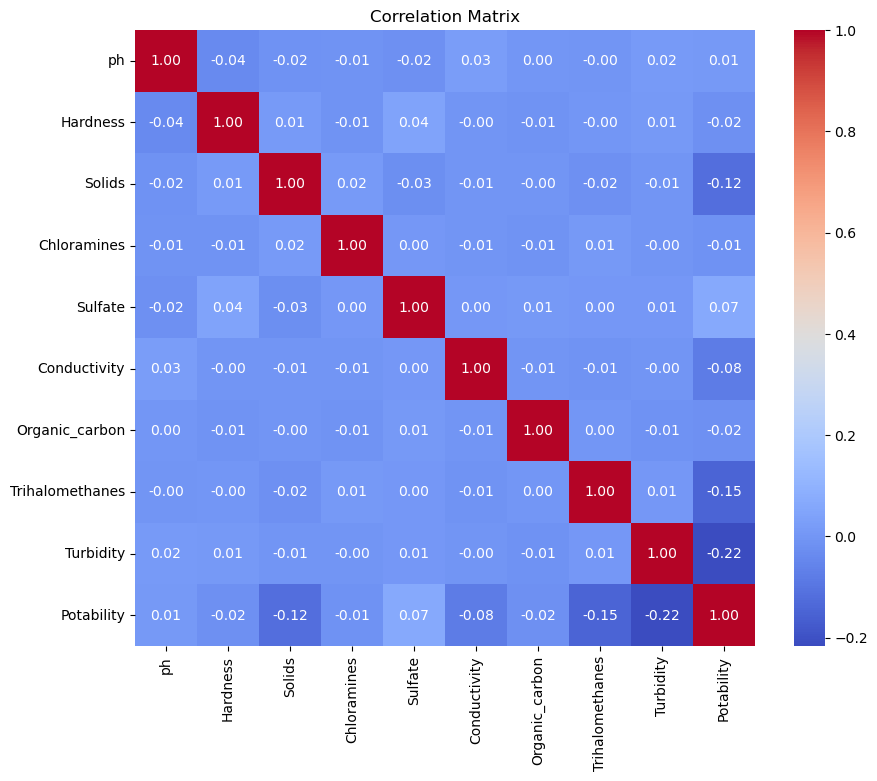

In [2]:
selected_features = ['ph', 'Hardness', 'Solids', 'Conductivity']

df[selected_features].hist(figsize=(12, 10))
plt.suptitle("Histograms for Selected Features") 
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='Potability', y='ph', data=df, ax=ax[0])
ax[0].set_title("pH Distribution")

sns.boxplot(x='Potability', y='Hardness', data=df, ax=ax[1])
ax[1].set_title("Hardness Distribution")

plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

X = df.drop('Potability', axis=1) 
y = df['Potability'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 3500
Test set size: 1500


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {acc_lr:.4f}")

print("\nDecision Tree:")
model_dt = DecisionTreeClassifier(random_state=42, max_depth = 5)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {acc_dt:.4f}")

print("\nModel Comparison")
if acc_lr > acc_dt:
    print(f"Better model: Logistic Regression ({acc_lr:.2%})")
else:
    print(f"Better model: Decision Tree ({acc_dt:.2%})")

Logistic Regression
Accuracy: 0.8447

Decision Tree:
Accuracy: 0.8287

Model Comparison
Better model: Logistic Regression (84.47%)


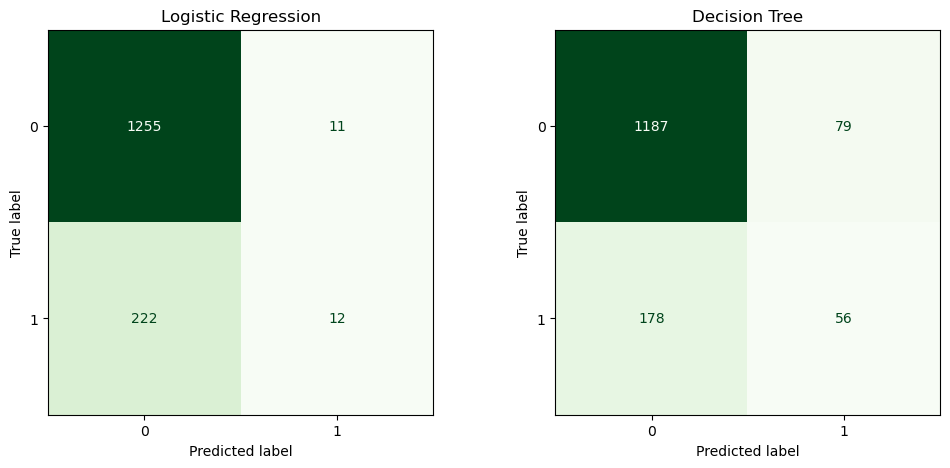


Comparison Table:
                 Model  Accuracy  F1-Score
0  Logistic Regression      0.84      0.09
1        Decision Tree      0.83      0.30


In [5]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

f1_lr = f1_score(y_test, y_pred_lr)
f1_dt = f1_score(y_test, y_pred_dt)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=ax[0], cmap='Greens', colorbar=False)
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=ax[1], cmap='Greens', colorbar=False)
ax[1].set_title("Decision Tree")
plt.show()

results_table = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree'],'Accuracy': [acc_lr, acc_dt],'F1-Score': [f1_lr, f1_dt]})
print("\nComparison Table:")
print(results_table.round(2))

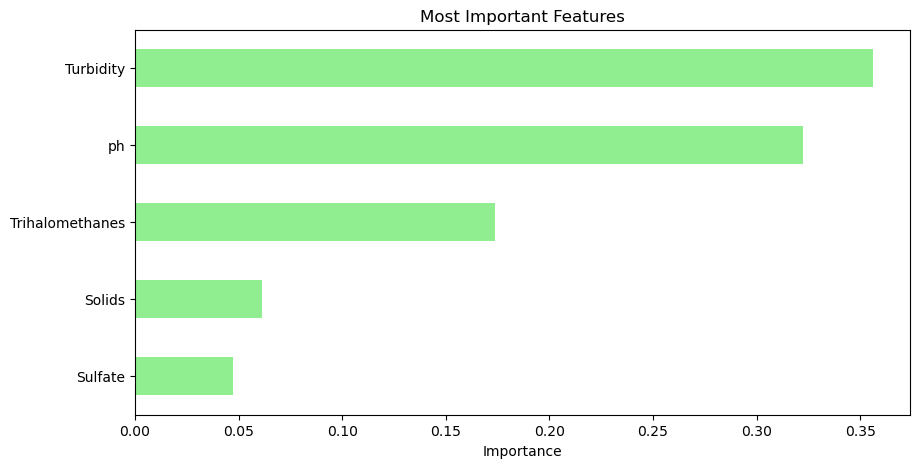

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(model_dt.feature_importances_, index=X.columns)

top_features = importance.nlargest(5).sort_values()

plt.figure(figsize=(10, 5))
top_features.plot(kind='barh', color='lightgreen')
plt.title("Most Important Features")
plt.xlabel("Importance")
plt.show()

### Conclusions and Model Comparison

I believe that the Decision Tree is the better model. Although Logistic Regression had higher Accuracy at approximately 84%, this result was misleading. This is because logistic regression achieved a very low F1-score of around 10%, which means that the model almost never detected drinkable water and was essentially guessing that all water is non-potable, since that class is most prevalent in the dataset.

The Decision Tree with Accuracy at 83% and F1-score at 30% performs significantly better at detecting drinkable water, making it a more useful model for this problem.